In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
import math
from collections import Counter
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

In [196]:
from google.colab import drive
drive.mount('/content/gdive')

Drive already mounted at /content/gdive; to attempt to forcibly remount, call drive.mount("/content/gdive", force_remount=True).


In [197]:
path = "/content/gdive/MyDrive/Machine Learning Sem3/Praktikum10/Data"

# **Data 1**

In [198]:
df_suhu = pd.read_excel(path + '/KNN - Suhu.xlsx')
df_suhu.head()

,Temperatur Udara (Celcius),Kecepatan Angin (km/jam),Klasifikasi / Persepsi Marry
0,10,0,Dingin
1,25,0,Panas
2,15,5,Dingin
3,20,3,Panas
4,18,7,Dingin


In [199]:
# data testing
X_test = 16
Y_test = 3

print("DATA TRAINING")
print(df_suhu)
print(f"DATA TESTING")
print(f"Temperatur Udara (Celcius): {X_test}°C")
print(f"Kecepatan Angin (km/jam): {Y_test} km/jam")

DATA TRAINING
   Temperatur Udara (Celcius)  Kecepatan Angin (km/jam)  \
0                          10                         0   
1                          25                         0   
2                          15                         5   
3                          20                         3   
4                          18                         7   
5                          20                        10   
6                          22                         5   
7                          24                         6   

  Klasifikasi / Persepsi Marry  
0                       Dingin  
1                        Panas  
2                       Dingin  
3                        Panas  
4                       Dingin  
5                       Dingin  
6                        Panas  
7                        Panas  
DATA TESTING
Temperatur Udara (Celcius): 16°C
Kecepatan Angin (km/jam): 3 km/jam


In [200]:
k = 3
jarak_data = []
for index, row in df_suhu.iterrows():
    # Hitung jarak Euclidean
    jarak = math.sqrt((X_test - row['Temperatur Udara (Celcius)'])**2 + (Y_test - row['Kecepatan Angin (km/jam)'])**2)
    jarak_data.append({
        'Index': index,
        'Temperatur Udara (Celcius)': row['Temperatur Udara (Celcius)'],
        'Kecepatan Angin (km/jam)': row['Kecepatan Angin (km/jam)'],
        'Klasifikasi / Persepsi Marry': row['Klasifikasi / Persepsi Marry'],
        'Jarak': jarak
    })
    print(f"Data {index}: ({row['Temperatur Udara (Celcius)']}, {row['Kecepatan Angin (km/jam)']}) - {row['Klasifikasi / Persepsi Marry']}")
    print(f"Jarak ke data testing: √(({X_test}-{row['Temperatur Udara (Celcius)']})² + ({Y_test}-{row['Kecepatan Angin (km/jam)']})²) = {jarak:.4f}")

Data 0: (10, 0) - Dingin
Jarak ke data testing: √((16-10)² + (3-0)²) = 6.7082
Data 1: (25, 0) - Panas
Jarak ke data testing: √((16-25)² + (3-0)²) = 9.4868
Data 2: (15, 5) - Dingin
Jarak ke data testing: √((16-15)² + (3-5)²) = 2.2361
Data 3: (20, 3) - Panas
Jarak ke data testing: √((16-20)² + (3-3)²) = 4.0000
Data 4: (18, 7) - Dingin
Jarak ke data testing: √((16-18)² + (3-7)²) = 4.4721
Data 5: (20, 10) - Dingin
Jarak ke data testing: √((16-20)² + (3-10)²) = 8.0623
Data 6: (22, 5) - Panas
Jarak ke data testing: √((16-22)² + (3-5)²) = 6.3246
Data 7: (24, 6) - Panas
Jarak ke data testing: √((16-24)² + (3-6)²) = 8.5440


In [201]:
print(f"PENGURUTAN JARAK DAN K-TETANGGA TERDEKAT")
jarak_terurut = sorted(jarak_data, key=lambda x: x['Jarak'])
k_tetangga_terdekat = jarak_terurut[:k]

for i, data in enumerate(jarak_terurut):
    print(f"{i+1}. Data {data['Index']}: Jarak = {data['Jarak']:.4f}, Klasifikasi = {data['Klasifikasi / Persepsi Marry']}")

print(f"\n{k} Tetangga Terdekat:")
for i, tetangga in enumerate(k_tetangga_terdekat):
    print(f"{i+1}. Data {tetangga['Index']}: ({tetangga['Temperatur Udara (Celcius)']}, {tetangga['Kecepatan Angin (km/jam)']}) - {tetangga['Klasifikasi / Persepsi Marry']} - Jarak: {tetangga['Jarak']:.4f}")

PENGURUTAN JARAK DAN K-TETANGGA TERDEKAT
1. Data 2: Jarak = 2.2361, Klasifikasi = Dingin
2. Data 3: Jarak = 4.0000, Klasifikasi = Panas
3. Data 4: Jarak = 4.4721, Klasifikasi = Dingin
4. Data 6: Jarak = 6.3246, Klasifikasi = Panas
5. Data 0: Jarak = 6.7082, Klasifikasi = Dingin
6. Data 5: Jarak = 8.0623, Klasifikasi = Dingin
7. Data 7: Jarak = 8.5440, Klasifikasi = Panas
8. Data 1: Jarak = 9.4868, Klasifikasi = Panas

3 Tetangga Terdekat:
1. Data 2: (15, 5) - Dingin - Jarak: 2.2361
2. Data 3: (20, 3) - Panas - Jarak: 4.0000
3. Data 4: (18, 7) - Dingin - Jarak: 4.4721


In [202]:
print(f"HASIL VOTING")
klasifikasi_tetangga = [tetangga['Klasifikasi / Persepsi Marry'] for tetangga in k_tetangga_terdekat]
print(f"Klasifikasi dari {k}-tetangga terdekat: {klasifikasi_tetangga}")

# Hitung frekuensi setiap kelas
frekuensi_klasifikasi = Counter(klasifikasi_tetangga)
print(f"Frekuensi klasifikasi: {dict(frekuensi_klasifikasi)}")

# Tentukan kelas dengan frekuensi tertinggi
hasil_voting = max(frekuensi_klasifikasi, key=frekuensi_klasifikasi.get)
print(f"Hasil voting: {hasil_voting}")
print(f"Berdasarkan perhitungan KNN dengan k={k}:")
print(f"Temperatur {X_test}°C dengan Kecepatan Angin {Y_test} km/jam diklasifikasikan sebagai {hasil_voting}")

HASIL VOTING
Klasifikasi dari 3-tetangga terdekat: ['Dingin', 'Panas', 'Dingin']
Frekuensi klasifikasi: {'Dingin': 2, 'Panas': 1}
Hasil voting: Dingin
Berdasarkan perhitungan KNN dengan k=3:
Temperatur 16°C dengan Kecepatan Angin 3 km/jam diklasifikasikan sebagai Dingin


# **Data 2**

In [203]:
df_kelulusan = pd.read_excel(path + '/KNN - Kelulusan.xlsx')
df_kelulusan.head()

,NIM,Hasil Sebelumnya,Hasil Prediksi
0,TI001,Lulus,Lulus
1,TI002,Lulus,Lulus
2,TI003,Lulus,Lulus
3,TI004,Lulus,Tidak Lulus
4,TI005,Lulus,Tidak Lulus


In [204]:
y_actual = df_kelulusan['Hasil Sebelumnya'].map({'Lulus': 1, 'Tidak Lulus': 0})
y_pred = df_kelulusan['Hasil Prediksi'].map({'Lulus': 1, 'Tidak Lulus': 0})

In [205]:
def buat_confusion_matrix(df_kelulusan):
  cm = confusion_matrix(y_actual, y_pred)
  cm_df = pd.DataFrame(cm, index=['Actual Tidak Lulus', 'Actual Lulus'], columns=['Predicted Tidak Lulus', 'Predicted Lulus'])
  return cm, cm_df

# Call the function and print the results
cm, cm_df = buat_confusion_matrix(df_kelulusan)
print("Confusion Matrix:")
print(cm_df)
print("Nilai Confusion Matrix (array):")
print(f"TN: {cm[0][0]}, FP: {cm[0][1]}")
print(f"FN: {cm[1][0]}, TP: {cm[1][1]}")

Confusion Matrix:
                    Predicted Tidak Lulus  Predicted Lulus
Actual Tidak Lulus                      4                1
Actual Lulus                            2                3
Nilai Confusion Matrix (array):
TN: 4, FP: 1
FN: 2, TP: 3


In [206]:
def hitung_metrik(df):
    accuracy = accuracy_score(y_actual, y_pred)
    precision = precision_score(y_actual, y_pred)
    recall = recall_score(y_actual, y_pred)

    # Konversi ke persentase
    accuracy_pct = accuracy * 100
    precision_pct = precision * 100
    recall_pct = recall * 100

    return accuracy_pct, precision_pct, recall_pct

accuracy, precision, recall = hitung_metrik(df_kelulusan)

print("Hasil Evaluasi Model:")
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")

Hasil Evaluasi Model:
Accuracy: 70.00%
Precision: 75.00%
Recall: 60.00%


# **Data 3**

In [207]:
df_cuaca = pd.read_csv(path + '/KNN - Cuaca.csv')
df_cuaca.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [208]:
df_cuaca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [209]:
df_cuaca.drop(columns=['Location'], inplace=True)

In [210]:
print(df_cuaca['Cloud Cover'].unique())
print(df_cuaca['Season'].unique())
print(df_cuaca['Weather Type'].unique())

['partly cloudy' 'clear' 'overcast' 'cloudy']
['Winter' 'Spring' 'Summer' 'Autumn']
['Rainy' 'Cloudy' 'Sunny' 'Snowy']


In [211]:
replacements = {
'Cloud Cover': {'partly cloudy': 0, 'clear': 1, 'overcast': 2, 'cloudy': 3},
'Season': {'Winter': 0, 'Spring': 1, 'Summer': 2, 'Autumn': 3},
'Weather Type': {'Rainy': 0, 'Cloudy': 1, 'Sunny': 2, 'Snowy': 3}}

df_cuaca = df_cuaca.replace(replacements, inplace=False)
df_cuaca.head()

/tmp/ipython-input-1238891178.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cuaca = df_cuaca.replace(replacements, inplace=False)


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Weather Type
0,14.0,73,9.5,82.0,0,1010.82,2,0,3.5,0
1,39.0,96,8.5,71.0,0,1011.43,7,1,10.0,1
2,30.0,64,7.0,16.0,1,1018.72,5,1,5.5,2
3,38.0,83,1.5,82.0,1,1026.25,7,1,1.0,2
4,27.0,74,17.0,66.0,2,990.67,1,0,2.5,0


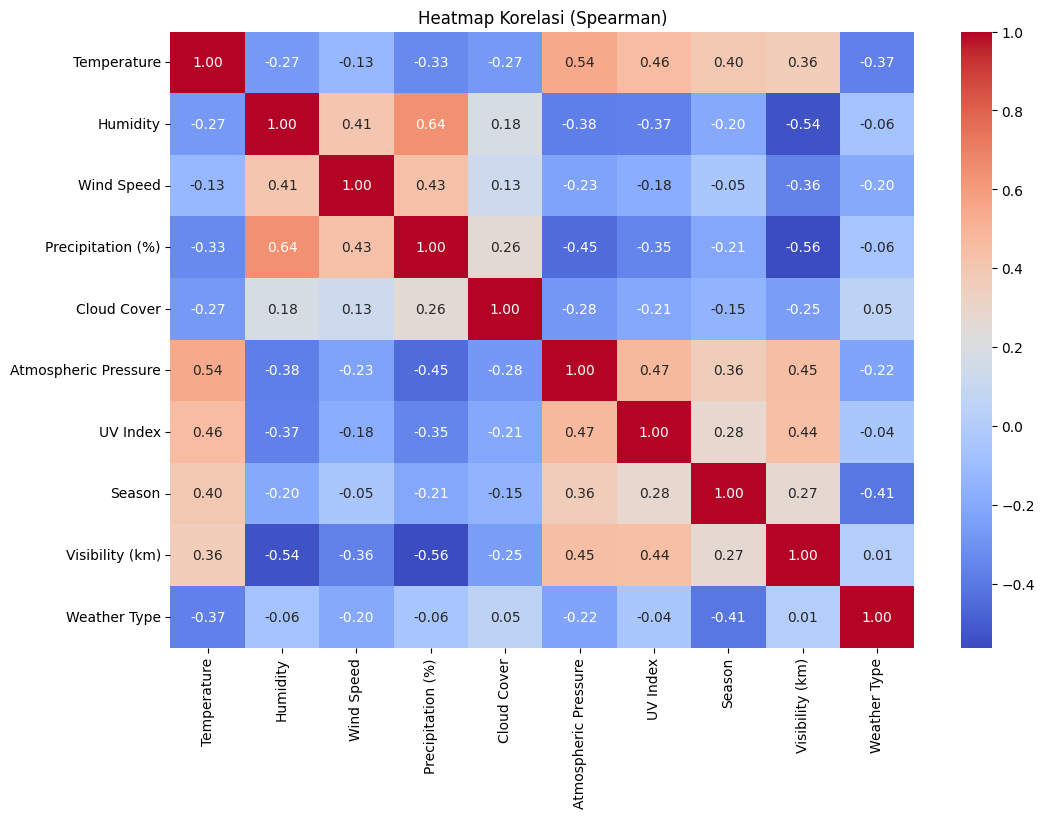

In [215]:
# Menghitung matriks korelasi menggunakan Spearman
correlation_matrix = df_cuaca.corr(method='spearman' )

# Membuat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap Korelasi (Spearman)")
plt.show()

/tmp/ipython-input-1637790272.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weather Type', data=df_cuaca, palette='Set2' )


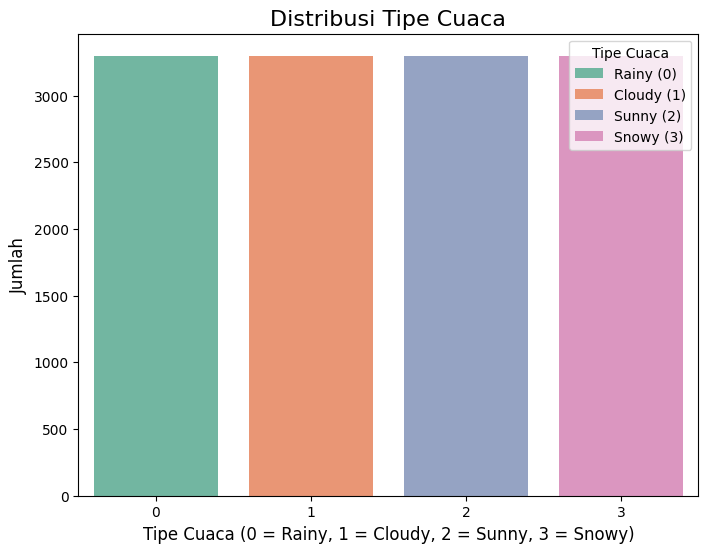

In [216]:
# Membuat diagram batang untuk status kelulusan
plt.figure(figsize=(8, 6))
sns.countplot(x='Weather Type', data=df_cuaca, palette='Set2' )

# Menambahkan judul dan label
plt.title('Distribusi Tipe Cuaca', fontsize=16)
plt.xlabel('Tipe Cuaca (0 = Rainy, 1 = Cloudy, 2 = Sunny, 3 = Snowy)', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Menambahkan legend (adjusted labels for correctness)
plt.legend(title='Tipe Cuaca', labels=['Rainy (0)', 'Cloudy (1)', 'Sunny (2)', 'Snowy (3)'], loc='upper right' )

# Menampilkan plot
plt.show()

In [218]:
# data yang dilatih
x_train = df_cuaca.drop(columns=['Weather Type'])
y_train = df_cuaca['Weather Type' ]

# data validasinya
x_test = df_cuaca.drop(columns = ['Weather Type' ])
y_test = df_cuaca['Weather Type' ]

# Normalisasi features after splitting
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [222]:
print("Before SMOTE:")
print(y_train.value_counts())

sm = SMOTE(random_state=42, k_neighbors=1)
x_train_smote, y_train_smote = sm.fit_resample(x_train_scaled, y_train)

print("After SMOTE:")
print(y_train_smote.value_counts())

Before SMOTE:
Weather Type
0    3300
1    3300
2    3300
3    3300
Name: count, dtype: int64
After SMOTE:
Weather Type
0    3300
1    3300
2    3300
3    3300
Name: count, dtype: int64


In [225]:
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs =- 1)
grid.fit(x_train_smote, y_train_smote)

print("Best Params:", grid.best_params_)
print("Best Score (CV):", grid.best_score_)

Best Params: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Best Score (CV): 0.9021212121212121


In [226]:
best_knn = grid.best_estimator_
best_knn.fit(x_train_smote, y_train_smote)

# Prediksi
y_pred = best_knn.predict(x_test_scaled)

In [227]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred) )


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      3300
           1       0.92      0.92      0.92      3300
           2       0.95      0.92      0.94      3300
           3       0.97      0.94      0.95      3300

    accuracy                           0.93     13200
   macro avg       0.93      0.93      0.93     13200
weighted avg       0.93      0.93      0.93     13200



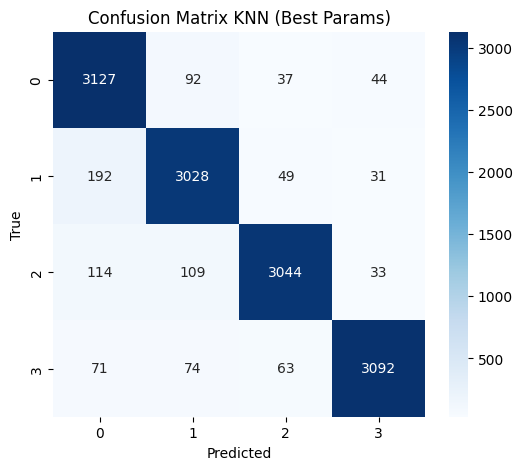

In [229]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d' )
plt.title("Confusion Matrix KNN (Best Params)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [230]:
cv_scores = cross_val_score(best_knn, x_train_smote, y_train_smote, cv=5)
print("Cross Validation Accuracy:", cv_scores.mean())
print("Std Dev:", cv_scores.std())

Cross Validation Accuracy: 0.9021212121212121
Std Dev: 0.005213530464874326


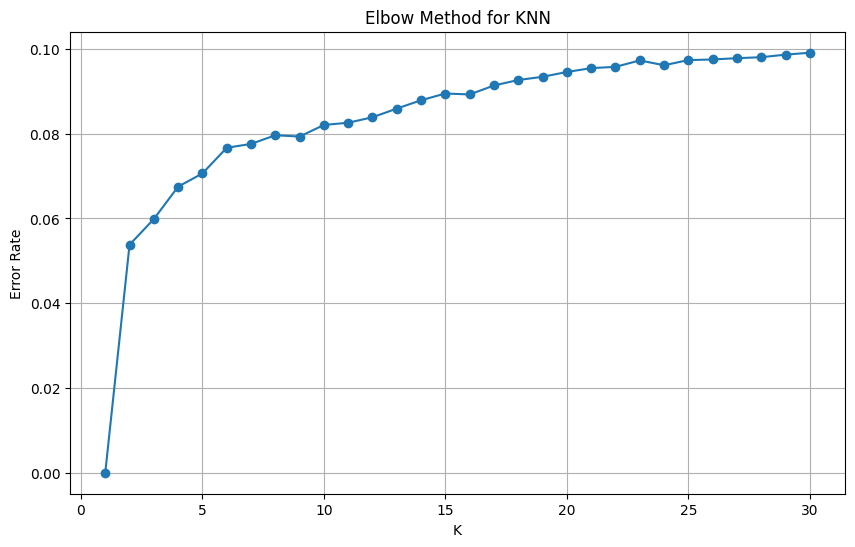

In [232]:
errors = []

for k in range(1, 31):
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(x_train_smote, y_train_smote)
    pred = knn_temp.predict(x_test_scaled)
    errors.append(np.mean(pred != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,31), errors, marker='o')
plt.title("Elbow Method for KNN")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.grid(True)
plt. show()